# CorrelAid machine-learning spring school 
## Section 5: Data Exploration 

Session takes place **Tuesday, 29.03.2022, 18h CEST**.

Author: Sebastian Zezulka
### **to be distributed on Wednesday, 23.03.2022**

During the spring school, we will use and analyse the "Forest Cover Type Dataset" from [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/covertype). In this section, you will learn how to set up a primary data exploration and data preparation in the machine learning pipeline.
We will take a close look at the practical problem and the data set. For the latter, we will discuss descriptive statistics and typical visualisations (matplotlib, note that seaborn exists), getting variable information, data cleaning (missings, recodings, normalisation) and, finally, discuss balanced/unbalanced samples and the use of test-training sets.

infos and ideas: https://towardsdatascience.com/predicting-forest-cover-types-with-the-machine-learning-workflow-1f6f049bf4df

### 0. Set up

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder

### 1. Load Data
**Task:** Download the CSV data from the given URL/repo and inspect a few rows from it. What size has the dataset?

In [31]:
# Read in csv data
forest_data = pd.read_csv("data/covtype.csv")

# Inspect first few rows of the data
forest_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## 2. Explanatory Analysis 


**Task:** Let's take a first look at the data we are going to analyse in the next weeks. We will predict the type of cover of a forest based on several features available. What, then, is the dependent variable in our data given the task at hand? What was the original purpose to collect the data at hand?

**Answer:** 

**### delete before distribution ###**


'Cover_Type' is the dependent variable in our setting. 7 Categories are recorded: 
1 -- Spruce/Fir
2 -- Lodgepole Pine
3 -- Ponderosa Pine
4 -- Cottonwood/Willow
5 -- Aspen
6 -- Douglas-fir
7 -- Krummholz.
Data was collected to predict information on neighbouring lands of natural resource managers responsible for developing ecosystem management strategies. The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado.

**Task:** Does the dataset contain missing values? Check how many categories of type of cover are recorded. How many observations do we have per category? Plot the number of observations per category. What do you see?

In [37]:
# check for missing values
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
# number of observations per cover type category 
forest_data.groupby('Cover_Type').count()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,...,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840
2,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,...,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301
3,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754,...,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754
4,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,...,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
5,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493,...,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493
6,17367,17367,17367,17367,17367,17367,17367,17367,17367,17367,...,17367,17367,17367,17367,17367,17367,17367,17367,17367,17367
7,20510,20510,20510,20510,20510,20510,20510,20510,20510,20510,...,20510,20510,20510,20510,20510,20510,20510,20510,20510,20510


Text(0.5, 1.0, 'Number of observations per type of Cover category')

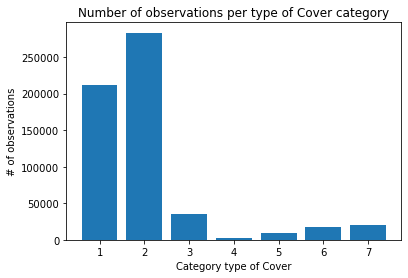

In [5]:
# bar plot of observations per cover type category 
x = list(range(1,8))
y = forest_data.groupby('Cover_Type').count().iloc[:,0]

plt.bar(x, y)
plt.xlabel('Category type of Cover')
plt.ylabel('# of observations')
plt.title('Number of observations per type of Cover category')

**Task:** Produce balanced dataset by randomly sampling from the Categories.

**Task:** Transform dummy variables (indicator variables, one-hot-coding) of "Type Wilderness" and "Type Soil" into two categorical variables for further analysis. How many categories have each variable and what do they encode respectivley?

In [26]:
# Check variables in data 
display(forest_data.columns)

# transform dummy variables into categorical one and drop dummies
forest_data['Wilderness_Area_Type'] = (forest_data.iloc[:,10:14] == 1).idxmax(1)
forest_data['Soil_Type'] = (forest_data.iloc[:,14:55] == 1).idxmax(1)
forest_data.drop(['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'], axis=1, inplace=True)

# check result
forest_data.head(25)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area_Type,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,5,Wilderness_Area1,Soil_Type29
1,2590,56,2,212,-6,390,220,235,151,6225,5,Wilderness_Area1,Soil_Type29
2,2804,139,9,268,65,3180,234,238,135,6121,2,Wilderness_Area1,Soil_Type12
3,2785,155,18,242,118,3090,238,238,122,6211,2,Wilderness_Area1,Soil_Type30
4,2595,45,2,153,-1,391,220,234,150,6172,5,Wilderness_Area1,Soil_Type29
5,2579,132,6,300,-15,67,230,237,140,6031,2,Wilderness_Area1,Soil_Type29
6,2606,45,7,270,5,633,222,225,138,6256,5,Wilderness_Area1,Soil_Type29
7,2605,49,4,234,7,573,222,230,144,6228,5,Wilderness_Area1,Soil_Type29
8,2617,45,9,240,56,666,223,221,133,6244,5,Wilderness_Area1,Soil_Type29
9,2612,59,10,247,11,636,228,219,124,6230,5,Wilderness_Area1,Soil_Type29


In [35]:
#forest_data['Wilderness_Area_Type'] = forest_data['Wilderness_Area_Type'].cat.codes

lb_make = OrdinalEncoder()
#X = [['Wilderness_Area1', 0.0], ['Wilderness_Area2', 1.0], ['Wilderness_Area3', 2.0], ['Wilderness_Area4', 3.0]]
#lb_make.fit(forest_data[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']])
#lb_make.categories_
forest_data['Wilderness_Area_Type'] = lb_make.fit_transform(forest_data[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']])
  
lb_make2 = OrdinalEncoder()
lb_make2.fit(np.array(forest_data['Soil_Type']).reshape(-1, 1))
forest_data['Soil_Type'] = lb_make2.transform(np.array(forest_data['Soil_Type']).reshape(-1, 1))

forest_data.head(25)

ValueError: Wrong number of items passed 4, placement implies 1

# #TODO
- categorical variables to numerical ones
- create balanced dataset? write function for it as example?

**Task:** What is the Cover Type with the highest mean distance to fire point? what is the std of hillshades at noon? What measures Elevation, Aspect, Slope and in what scales? How many observation do we have, how many per cover type? 

**Task:** Based on the shortened description of the data below, compute the ...

**Task:** Create three plots of 

**Task:** Subset the dataset to...

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area_Type,Soil_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,2.051471,1.114462,1.114462
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,1.396504,1.061295,1.061295
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,1.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,2.000000,1.000000,1.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,2.000000,2.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,7.000000,3.000000,3.000000


(array([9., 2., 0., 0., 0., 0., 0., 0., 1., 1.]),
 array([1.06129480e+00, 1.56880652e+02, 3.12700010e+02, 4.68519367e+02,
        6.24338725e+02, 7.80158082e+02, 9.35977440e+02, 1.09179680e+03,
        1.24761615e+03, 1.40343551e+03, 1.55925487e+03]),
 <BarContainer object of 10 artists>)

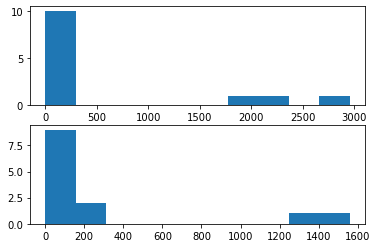

In [86]:
# Descriptive Statistics
data_describe = forest_data.describe()
display(data_describe)

fig, ax = plt.subplots(2)
ax[0].hist(data_describe.loc['mean',:])
ax[1].hist(data_describe.loc['std',:])

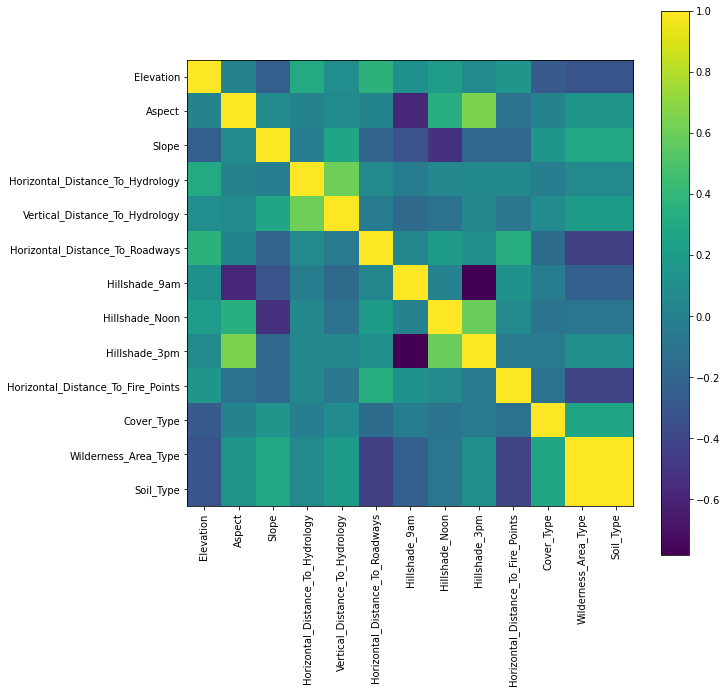

In [84]:
# Correlation Matrix of Features
labels = forest_data.columns

x_ = range(len(labels))
cor = forest_data[labels].corr()

fig, ax = plt.subplots(1,1, figsize=(10, 10))
im = ax.imshow(cor)
ax.set_xticks(x_)
ax.set_yticks(x_)
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels, rotation=0)

plt.colorbar(im, ax=ax)
plt.show()

## add histograms or density plots of features

### 2.1 Numerical Features

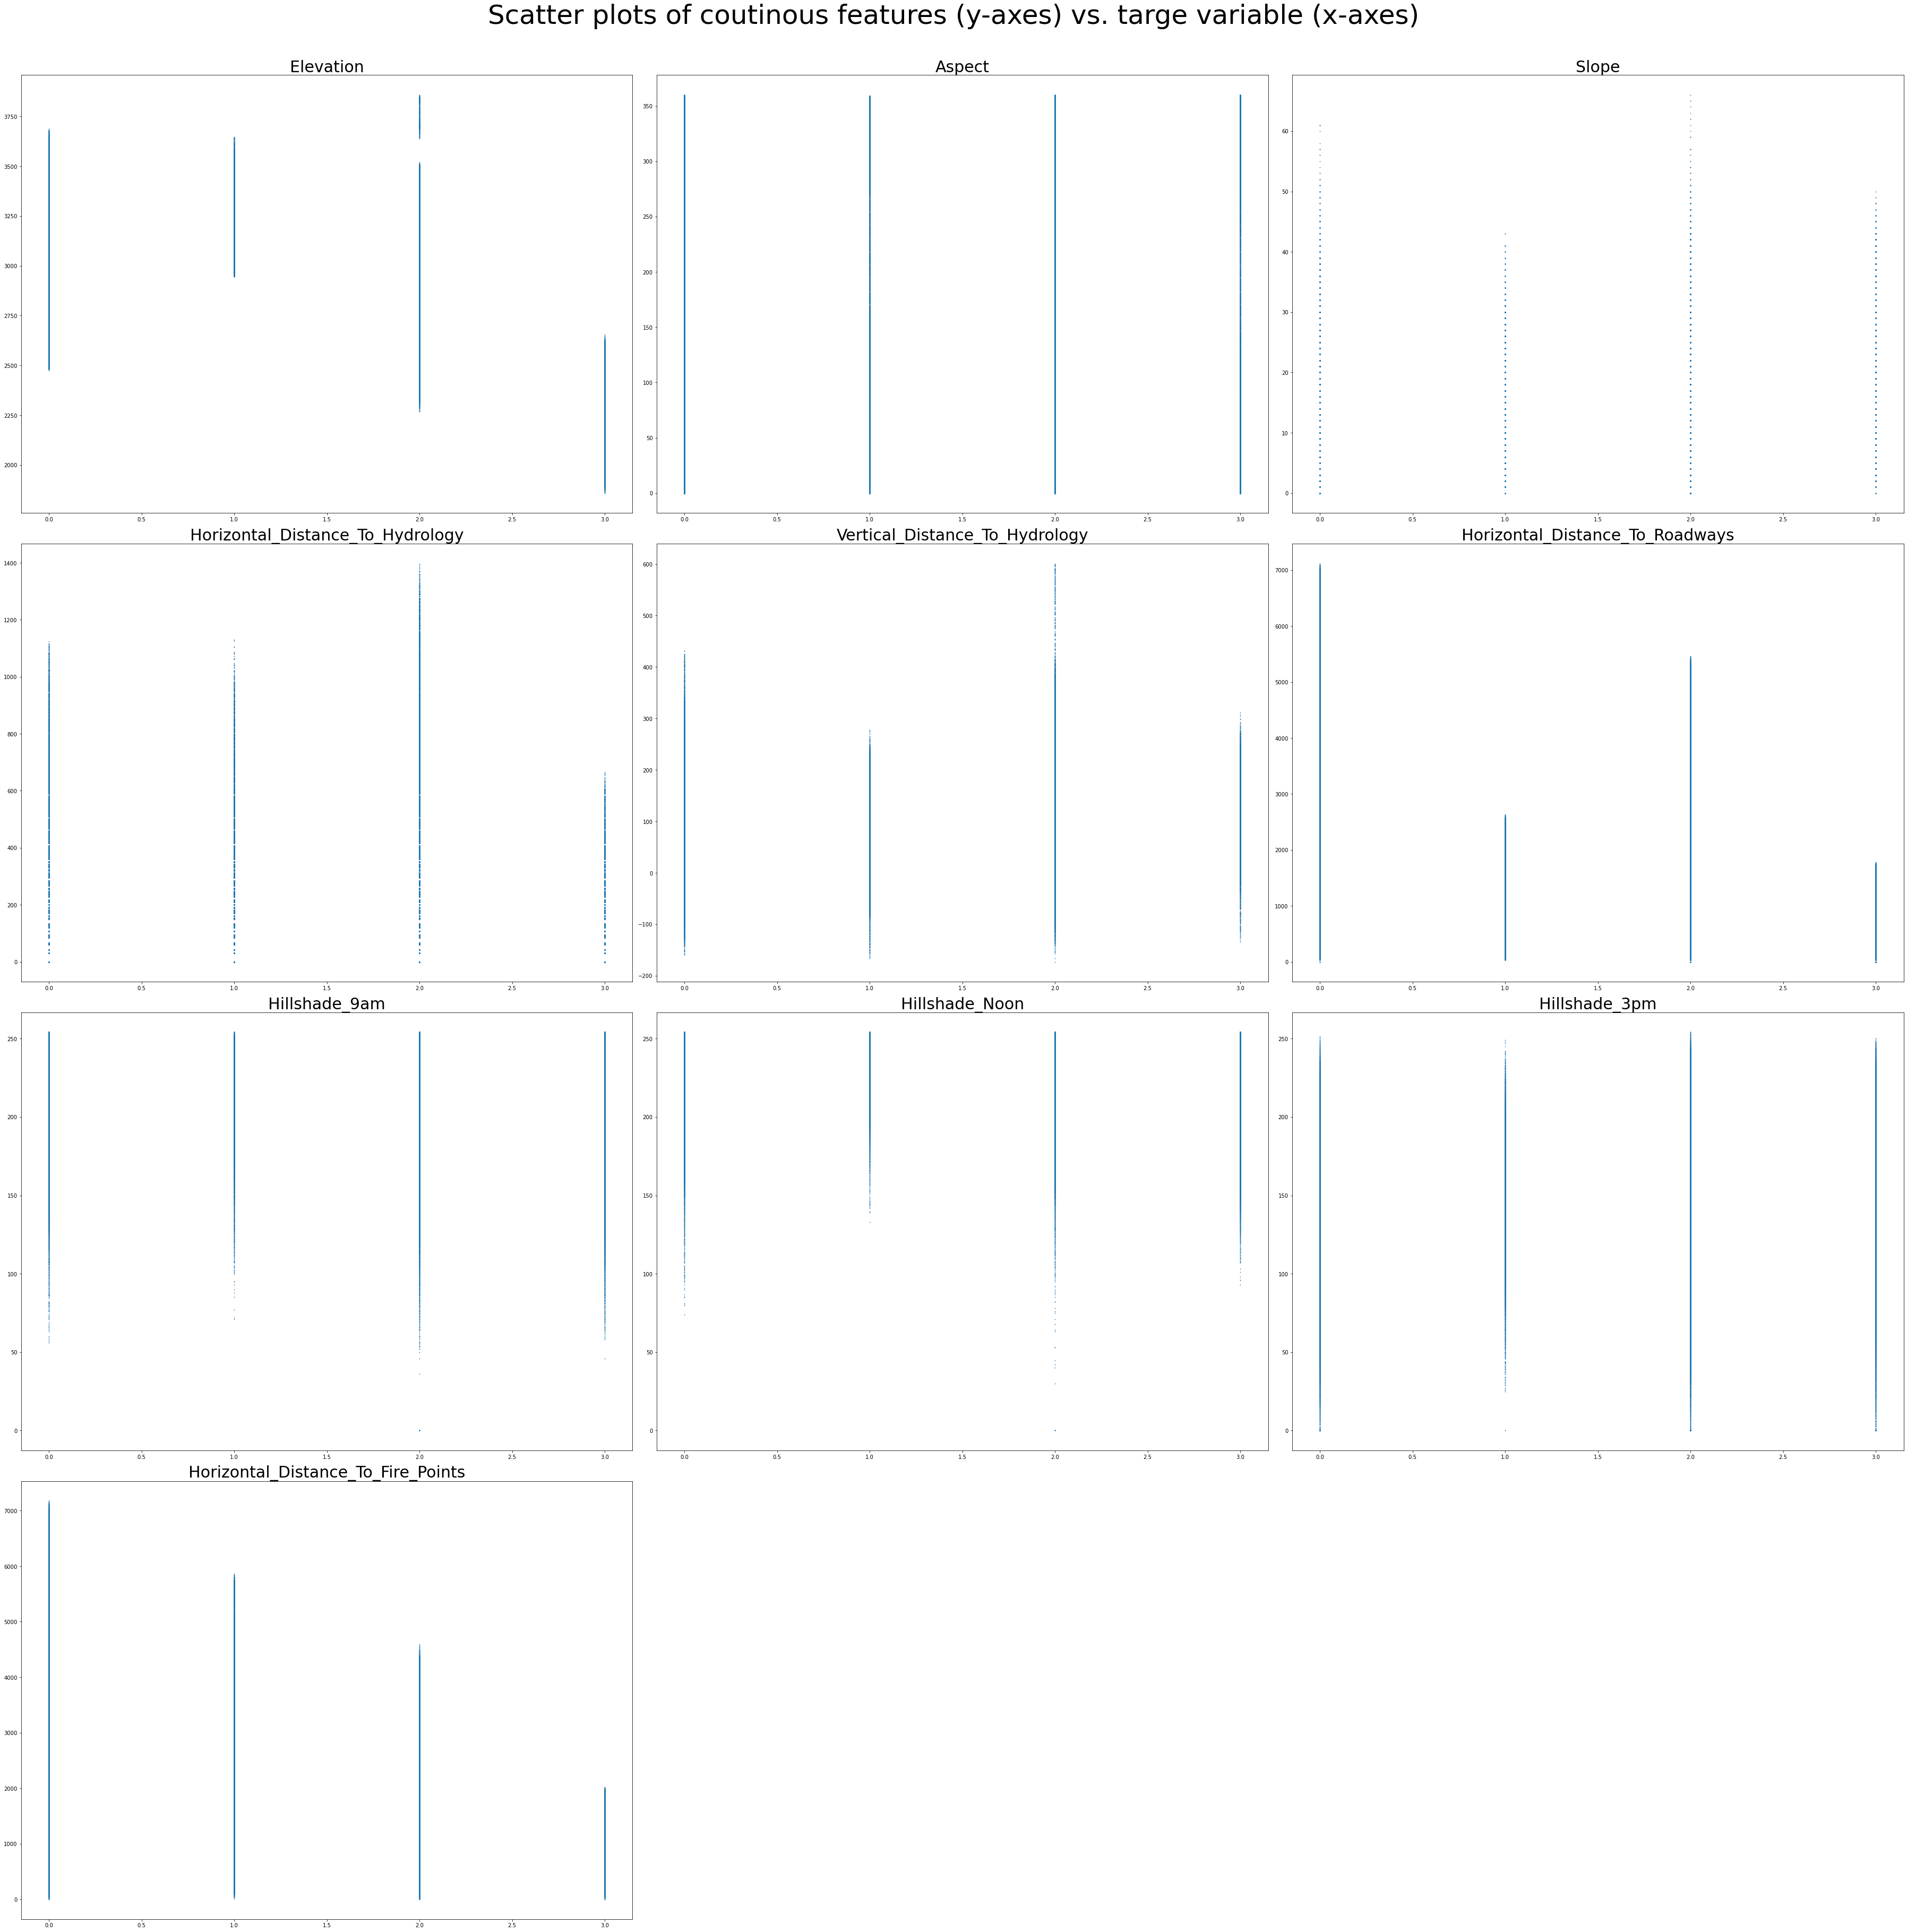

In [88]:
# Scatter Plot of numerical Features
'''
labels = forest_data.columns

#fig = plt.figure(figsize=(15,15))
c=1
for l in range(10):
    for r in range(10):
        #plt.subplot(10,10,c)
        #plt.figure(figsize=(10, 4))
        plt.scatter(forest_data.iloc[:,l].values, forest_data.iloc[:,r].values)
        plt.xlabel(labels[l])
        plt.ylabel(labels[r])
        plt.tight_layout()
        plt.show();
        c += 1

#fig.suptitle('Histogramms of observations', x=0.5, y=1)
#fig.tight_layout()
#fig.show()
'''
# Scatter plots of the target variable vs. features
features = np.arange(0, len(forest_data.transpose()))
col_names = list(forest_data.columns)

fig = plt.figure(figsize=(50,50))
c=1
for i in features[0:10]:
    plt.subplot(4,3,c)
    plt.scatter(forest_data.iloc[:,-1], forest_data.iloc[:,i], s=0.5)
    plt.title(col_names[i], size=30)
    c+=1

fig.suptitle('Scatter plots of coutinous features (y-axes) vs. targe variable (x-axes)', x=0.5, y=1.01,size=50)
fig.tight_layout()
#fig.show()

### 3. PCA and data-compression
Exkurs - won't discuss in life session but so that you know it exists.
Three motivations for dimensionality reduction: save memory, find "structure", differences between known classes of data.
Projecting (centered) data on first m right singular vectors//first m eigenvectors of cov/cor matrix.
Scaling of data changes results, hard (or impossible) to interpret when features have not the same unit! 

### 4. Preprocessing 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#TODO 
- shuffle data?
- write function that normalises data by hand to show effect

In [68]:
# test and training set split
y = forest_data['Cover_Type']
X = forest_data.drop(['Cover_Type'] , axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)
X_train.shape

(406708, 54)

In [69]:
X.shape

(581012, 54)

In [70]:
X_cat_train = X_train.iloc[:, 10:54].values
X_num_train = X_train.iloc[:, 0:10].values

X_cat_test = X_test.iloc[:, 10:54].values
X_num_test = X_test.iloc[:, 0:10].values

scaler = StandardScaler()
scaler.fit(X_num_train)
X_num_train_trans = scaler.transform(X_num_train)
X_num_test_trans = scaler.transform(X_num_test)

X_train_trans = np.hstack((X_num_train_trans, X_cat_train))
X_test_trans = np.hstack((X_num_test_trans, X_cat_test))
X_train_trans.shape

(406708, 54)

In [ ]:
forest_data_trans = pd.DataFrame(np.vstack((X_train_trans, X_test_trans)))
forest_data_trans.head()